# KANOPUS_V_IK	MSS_PSS 

This is the best case one can get with KANOPUS-V IK MSS_PSS:

- the zip archive contains the multispectral and pan products
- an XMl file is included for each

Products downloaded from:

- cos2/calls/796/acquisitions/796-ROSCOSMOS-KANOPUS_V-Kanopus-V-IK_19377_02_Flood_Bolivia_10012021/Kanopus-V-IK_19377_02_Flood_Bolivia_10012021-product.zip


In [1]:
from lxml import etree
from pystac import *
from shapely.geometry import Point, Polygon, mapping
import json
from datetime import datetime
import numpy as np
import collections

These are the paths to the XML metadata files provided with the product:

In [2]:
mss_metadata = 'Kanopus-V-IK_MSS_19377_02_Bolivia_10012021/Kanopus-V-IK_MSS_19377_02_Bolivia_10012021.xml'
pss_metadata = 'Kanopus-V-IK_PSS_19377_02_Bolivia_10012021/Kanopus-V-IK_PSS_19377_02_Bolivia_10012021.xml'

In [3]:
parser = etree.XMLParser()
pss_tree = etree.parse(pss_metadata, parser)

In [4]:

mss_tree = etree.parse(mss_metadata, parser)

STAC properties:

In [5]:
properties = {}

Read the core metadata in a dict

In [6]:
mss_main = {}
pss_main = {}

for index, line in enumerate(mss_tree.xpath('/PASP_ROOT')[0].text.split('\n')):
    if line == "":
        continue
    print(index, line)
    mss_main[line.split('=')[0].strip()] = line.split('=')[1].strip().replace('"', '')
    
for index, line in enumerate(pss_tree.xpath('/PASP_ROOT')[0].text.split('\n')):
    if line == "":
        continue
    print(index, line)
    pss_main[line.split('=')[0].strip()] = line.split('=')[1].strip().replace('"', '')
    

1 Version = 1.0.0.0
2 cOrganization = "АО "
3 cModelTxtName = "Канопус-В ИК"
4 cProgramm = "Российские космические системы.FormSatD"
5 tSessionTime = 18:56:7.000000
6 dSessionDate = 10/1/2021
7 dSessionDateUTC = 10/1/2021
8 tSessionTimeUTC = 15:56:7.000000
9 cDataFileName = "KVIK_19382_19377_02_3NP2_07_ORT_S_000911_110121.tiff"
10 cProcLevel = "2B"
11 nMarH_PUL42 = 2559.83693440817
12 nMarH_WGS84 = 2824.42468542924
13 nMarH_SK95 = 2567.30737733003
14 nMarH_GSK_2011 = 2823.33915202878
15 bSunAngle = 82.0702588025395, 112.525259934873
16 dSunDate = 10/1/2021
17 tSunTime = 18:56:32.000000
18 bSatAngle = 85.3792011047271, 15.1674929356836
1 Version = 1.0.0.0
2 cOrganization = "АО "
3 cModelTxtName = "Канопус-В ИК"
4 cProgramm = "Российские космические системы.FormSatD"
5 tSessionTime = 18:56:7.000000
6 dSessionDate = 10/1/2021
7 dSessionDateUTC = 10/1/2021
8 tSessionTimeUTC = 15:56:7.000000
9 cDataFileName = "KVIK_19382_19377_02_3NP2_07_ORT_PSS1_180411_110121.tiff"
10 cProcLevel = "2B"
11 

## Identifier

```
cDataFileName = "KVIK_19382_19377_02_3NP2_07_ORT_S_000911_110121.tiff"
cDataFileName = "KVIK_19382_19377_02_3NP2_07_ORT_PSS1_180411_110121.tiff"
```

Here, the identifier is the common part of the two data file names

Use the common part of the pss_main['cDataFileName'] and mss_main['cDataFileName'] values

In [7]:
'_'.join(pss_main['cDataFileName'].split('_')[:7])

'KVIK_19382_19377_02_3NP2_07_ORT'

In [8]:
'_'.join(mss_main['cDataFileName'].split('_')[:7])

'KVIK_19382_19377_02_3NP2_07_ORT'

In [9]:
item_id = '_'.join(mss_main['cDataFileName'].split('_')[:7])
item_id

'KVIK_19382_19377_02_3NP2_07_ORT'

## Processing

In [10]:
properties['processing:level'] = mss_main['cProcLevel']

## Time

In [11]:
properties['datetime'] = datetime.strptime(f"{mss_main['dSessionDateUTC']}T{mss_main['tSessionTimeUTC']}", '%d/%m/%YT%H:%M:%S.000000').strftime('%Y-%m-%dT%H:%M:%SZ')
properties['start_datetime'] = datetime.strptime(f"{mss_main['dSessionDateUTC']}T{mss_main['tSessionTimeUTC']}", '%d/%m/%YT%H:%M:%S.000000').strftime('%Y-%m-%dT%H:%M:%SZ')

In [12]:
properties

{'processing:level': '2B',
 'datetime': '2021-01-10T15:56:07Z',
 'start_datetime': '2021-01-10T15:56:07Z'}

## Spatial information

Read the longitudes and latitudes provided under /PASP_ROOT/Polygon

In [13]:
polygon_info = {}

for index, line in enumerate(mss_tree.xpath('/PASP_ROOT/Polygon')[0].text.split('\n')):
    if line == "":
        continue
  
    polygon_info[line.split('=')[0].strip()] = line.split('=')[1].strip().replace('"', '')
    


Convert to float

In [14]:
lon = [ float(z) for z in polygon_info['bLon'].split(',')]
lat = [ float(z) for z in polygon_info['bLat'].split(',')]


In [15]:
points = []
for i in range(0, int(polygon_info['nPnt'])):

    points.append(Point(lon[i], lat[i]))

In [16]:
footprint = Polygon([p.x, p.y] for p in points)

bbox = list(footprint.bounds)

geometry=mapping(footprint)


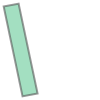

In [17]:
footprint

In [18]:
bbox

[-65.5177238583723, -19.440952056577, -65.0881390970004, -18.2653909759521]

In [19]:
geometry

{'type': 'Polygon',
 'coordinates': (((-65.0881390970004, -19.4055735212105),
   (-65.1073437707072, -19.3129773087026),
   (-65.1077394820459, -19.313050723806),
   (-65.1258085633459, -19.2257940228378),
   (-65.1262009611196, -19.2258666204057),
   (-65.1443074368364, -19.1384344625831),
   (-65.1446866295955, -19.1385048820649),
   (-65.1627971793989, -19.0510192968612),
   (-65.1631774816718, -19.0510903727437),
   (-65.1812921144921, -18.9635472560845),
   (-65.1816780150707, -18.9636198132761),
   (-65.1997497666063, -18.8761817701308),
   (-65.2001397760286, -18.8762551407493),
   (-65.2181618299444, -18.7889437967296),
   (-65.2185539202676, -18.7890174313048),
   (-65.2365800780069, -18.701651262554),
   (-65.2369729756478, -18.7017250419519),
   (-65.2550376120101, -18.6141829188724),
   (-65.2554311769347, -18.6142569756544),
   (-65.2734041277528, -18.5269880978803),
   (-65.2737947606496, -18.5270616716831),
   (-65.2917861062033, -18.4396782461417),
   (-65.292170729726,

## Projection

Extracted from /PASP_ROOT/Geo/GeoCoding
    

In [20]:
geocoding = {}

for index, line in enumerate(mss_tree.xpath('/PASP_ROOT/Geo/GeoCoding')[0].text.split('\n')):
    if line == "":
        continue
    print(index, line)
    
        
    geocoding[line.split('=')[0].strip()] = line.split('=')[1].strip().replace('"', '')
    

1 cCoordSystName = "WGS 84 / UTM zone 20N"
2 nCoordSystCode = 32620
3 cZoneName = "UTM zone 20N"
4 nZoneCode = 16020
5 cTrMethodName = "Поперечная проекция Меркатора"
6 nTrMethodCode = 1
7 cGeoDatName = "WGS 84"
8 nGeoDatCode = 4326
9 nLonOfOrig = -63
10 nLatOfOrig = 0
11 nScAtOrig = 0.9996
12 nFalsEast = 500000
13 nFalsNord = 0


In [21]:
properties['proj:epsg'] = f"EPSG:{geocoding['nCoordSystCode']}"

In [22]:
properties

{'processing:level': '2B',
 'datetime': '2021-01-10T15:56:07Z',
 'start_datetime': '2021-01-10T15:56:07Z',
 'proj:epsg': 'EPSG:32620'}

## Item

In [23]:
item = Item(id=item_id, 
           geometry=mapping(footprint),
           bbox=bbox,
           datetime=datetime.strptime(properties['datetime'], '%Y-%m-%dT%H:%M:%SZ'),
           properties=properties,
           stac_extensions=['eo', 'sat', 'proj', 'processing'])

## Assets

pan asset

In [24]:
pan_asset=Asset(href='./{}'.format(pss_main['cDataFileName']), media_type=MediaType.GEOTIFF,
              roles=['data'])

eo_bands = [extensions.eo.Band.create(name=b, 
                          common_name=b,
                          description=f'{b}') for b in ['pan']]

eo_item = extensions.eo.EOItemExt(item)
eo_item.set_bands(eo_bands, asset=pan_asset)

In [25]:
item.add_asset(key='pan', 
               asset=pan_asset)

<Item id=KVIK_19382_19377_02_3NP2_07_ORT>

MSS asset provides the radimetic information as: 

```xml
<Device>
<Ch1>
nChannelNumber = 1
bSpectralZone = 0.47, 0.53
</Ch1>
<Ch2>
nChannelNumber = 2
bSpectralZone = 0.52, 0.6
</Ch2>
<Ch3>
nChannelNumber = 3
bSpectralZone = 0.64, 0.69
</Ch3>
<Ch4>
nChannelNumber = 4
bSpectralZone = 0.76, 0.84
</Ch4>
</Device>
```

**NOTE** This info may be in a random order, so we do a lookup to get the band names in the order of the bands in the MSS asset


In [26]:
def get_cbn(spectral_range):
    
    def mean(numbers):
        return round(float(sum(numbers)) / max(len(numbers), 1), 2)

    if "{:.2f}".format(mean(spectral_range)) in ["{:.2f}".format(_) for _ in np.arange(0.63, 0.69, 0.01)]: 
        
        return 'red'
    
    elif "{:.2f}".format(mean(spectral_range)) in ["{:.2f}".format(_) for _ in np.arange(0.52, 0.60, 0.01)]: 
        
        return 'green'

    elif "{:.2f}".format(mean(spectral_range)) in ["{:.2f}".format(_) for _ in np.arange(0.44, 0.52, 0.01)]: 
        
        return 'blue'
    
    elif "{:.2f}".format(mean(spectral_range)) in ["{:.2f}".format(_) for _ in np.arange(0.75, 0.84, 0.01)]: 
        
        return 'nir'

In [27]:
channels = {}

for ch in ['Ch1', 'Ch2', 'Ch3', 'Ch4']:
    
    channel = {}
    
    for index, line in enumerate(mss_tree.xpath(f'/PASP_ROOT/Device/{ch}')[0].text.split('\n')):
        if line == "":
            continue

        channel[line.split('=')[0].strip()] = line.split('=')[1].strip().replace('"', '')
    
    index_ch = channel['nChannelNumber']
    
    for _ in ['nChannelNumber', 'bSPEA', 'bSPEA_APPROX', 'bEA']:
        channel.pop(_)

    channels[index_ch] = get_cbn((float(channel['bSpectralZone'].split(',')[0]), float(channel['bSpectralZone'].split(',')[1])))
    
channels = collections.OrderedDict(sorted(channels.items()))

channels

OrderedDict([('1', 'blue'), ('2', 'green'), ('3', 'red'), ('4', 'nir')])

In [28]:
list(channels.values())

['blue', 'green', 'red', 'nir']

In [29]:
mss_asset=Asset(href='./{}'.format(mss_main['cDataFileName']), media_type=MediaType.GEOTIFF,
              roles=['data'])

eo_bands = [extensions.eo.Band.create(name=b, 
                          common_name=b,
                          description=f'{b}') for b in list(channels.values())]

eo_item = extensions.eo.EOItemExt(item)
eo_item.set_bands(eo_bands, asset=mss_asset)

In [30]:
item.add_asset(key='mss', asset=mss_asset)

<Item id=KVIK_19382_19377_02_3NP2_07_ORT>

In [31]:
item.to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0-beta3',
 'id': 'KVIK_19382_19377_02_3NP2_07_ORT',
 'properties': {'processing:level': '2B',
  'datetime': '2021-01-10T15:56:07Z',
  'start_datetime': '2021-01-10T15:56:07Z',
  'proj:epsg': 'EPSG:32620'},
 'geometry': {'type': 'Polygon',
  'coordinates': (((-65.0881390970004, -19.4055735212105),
    (-65.1073437707072, -19.3129773087026),
    (-65.1077394820459, -19.313050723806),
    (-65.1258085633459, -19.2257940228378),
    (-65.1262009611196, -19.2258666204057),
    (-65.1443074368364, -19.1384344625831),
    (-65.1446866295955, -19.1385048820649),
    (-65.1627971793989, -19.0510192968612),
    (-65.1631774816718, -19.0510903727437),
    (-65.1812921144921, -18.9635472560845),
    (-65.1816780150707, -18.9636198132761),
    (-65.1997497666063, -18.8761817701308),
    (-65.2001397760286, -18.8762551407493),
    (-65.2181618299444, -18.7889437967296),
    (-65.2185539202676, -18.7890174313048),
    (-65.2365800780069, -18.701651262554),
  

## Additional info

In [32]:
properties['mission'] = 'KANOPUS-V'
properties['sensor'] = 'MSS-PSS'

## Write to disk

In [33]:
write_file(item, include_self_link=True, dest_href=f'MetadataExtractorsTests_{item.id}.json')